In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import quantstats_lumi as qs

from utils import *
from datetime import datetime
from double_crossover_strategy import DoubleCrossoverStrategy

#plt.style.use("fivethirtyeight")
#plt.style.use("ggplot")
plt.style.use("classic")
figsize = (14, 6)

In [50]:
yf.download(["GOOG", "IBM", "aapl"], start="2022-01-01")

[*********************100%%**********************]  3 of 3 completed


Price        Adj Close                               Close              \
Ticker            AAPL        GOOG         IBM        AAPL        GOOG   
Date                                                                     
2022-01-03  179.724548  145.074493  122.363739  182.009995  145.074493   
2022-01-04  177.443573  144.416504  124.144714  179.699997  144.416504   
2022-01-05  172.723587  137.653503  124.324593  174.919998  137.653503   
2022-01-06  169.840240  137.550995  121.734116  172.000000  137.550995   
2022-01-07  170.008118  137.004501  121.275383  172.169998  137.004501   
...                ...         ...         ...         ...         ...   
2024-04-01  170.029999  156.500000  189.830002  170.029999  156.500000   
2024-04-02  168.839996  155.869995  188.880005  168.839996  155.869995   
2024-04-03  169.649994  156.369995  190.899994  169.649994  156.369995   
2024-04-04  168.820007  151.940002  187.940002  168.820007  151.940002   
2024-04-05  169.580002  153.940002  189.139999  169.580002  153.940002   

Price                         High                                 Low  \
Ticker             IBM        AAPL        GOOG         IBM        AAPL   
Date                                                                     
2022-01-03  136.039993  182.880005  145.550003  136.289993  177.710007   
2022-01-04  138.020004  182.940002  146.610001  139.949997  179.119995   
2022-01-05  138.220001  180.169998  144.298004  142.199997  174.639999   
2022-01-06  135.339996  175.300003  139.686005  138.410004  171.639999   
2022-01-07  134.830002  174.139999  138.254745  135.660004  171.029999   
...                ...         ...         ...         ...         ...   
2024-04-01  189.830002  171.250000  157.000000  190.460007  169.479996   
2024-04-02  188.880005  169.339996  155.990005  189.800003  168.229996   
2024-04-03  190.899994  170.679993  156.550003  191.350006  168.580002   
2024-04-04  187.940002  171.919998  156.179993  193.279999  168.820007   
2024-04-05  189.139999  170.389999  154.839996  190.320007  168.949997   

Price                                     Open                          \
Ticker            GOOG         IBM        AAPL        GOOG         IBM   
Date                                                                     
2022-01-03  143.502502  133.630005  177.830002  144.475494  134.070007   
2022-01-04  143.816147  135.899994  182.630005  145.550507  136.100006   
2022-01-05  137.523499  137.880005  179.610001  144.181000  138.309998   
2022-01-06  136.763504  132.509995  172.699997  137.497498  138.199997   
2022-01-07  135.789001  133.509995  172.889999  137.904999  134.899994   
...                ...         ...         ...         ...         ...   
2024-04-01  151.649994  188.520004  171.190002  151.830002  190.000000   
2024-04-02  153.460007  187.600006  169.080002  154.750000  189.139999   
2024-04-03  154.132004  188.490005  168.789993  154.919998  188.600006   
2024-04-04  151.880005  187.339996  170.289993  155.080002  192.000000   
2024-04-05  151.080994  188.020004  169.589996  151.679993  188.589996   

Price          Volume                     
Ticker           AAPL      GOOG      IBM  
Date                                      
2022-01-03  104487900  25214000  4605900  
2022-01-04   99310400  22928000  7300000  
2022-01-05   94537600  49642000  8956900  
2022-01-06   96904000  29050000  9908100  
2022-01-07   86709100  19408000  5238100  
...               ...       ...      ...  
2024-04-01   46240500  24469800  2364300  
2024-04-02   49329500  17598100  2693500  
2024-04-03   47691700  17266200  2826200  
2024-04-04   53704400  24184800  2983900  
2024-04-05   42055200  16289800  2013600  

[567 rows x 18 columns]

In [8]:
aapl = yf.Ticker("aapl")

In [45]:
history = aapl.history(start="1990-01-01")
display(history)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.248953,0.264843,0.247188,0.263078,183198400,0.0,0.0
1990-01-03 00:00:00-05:00,0.268375,0.268375,0.264843,0.264843,207995200,0.0,0.0
1990-01-04 00:00:00-05:00,0.270141,0.273672,0.263078,0.265727,221513600,0.0,0.0
1990-01-05 00:00:00-05:00,0.266610,0.270141,0.261312,0.266610,123312000,0.0,0.0
1990-01-08 00:00:00-05:00,0.264843,0.268375,0.261312,0.268375,101572800,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-01 00:00:00-04:00,171.190002,171.250000,169.479996,170.029999,46240500,0.0,0.0
2024-04-02 00:00:00-04:00,169.080002,169.339996,168.229996,168.839996,49329500,0.0,0.0
2024-04-03 00:00:00-04:00,168.789993,170.679993,168.580002,169.649994,47691700,0.0,0.0


<Axes: xlabel='Date'>

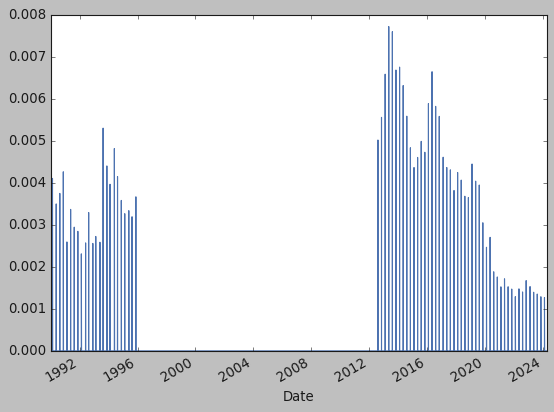

In [48]:
(history["Dividends"] / history["Close"]).plot()

In [49]:
aapl.dividends

Date
1990-02-16 00:00:00-05:00    0.000982
1990-05-21 00:00:00-04:00    0.000982
1990-08-20 00:00:00-04:00    0.000982
1990-11-16 00:00:00-05:00    0.001071
1991-02-15 00:00:00-05:00    0.001071
                               ...   
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
2023-08-11 00:00:00-04:00    0.240000
2023-11-10 00:00:00-05:00    0.240000
2024-02-09 00:00:00-05:00    0.240000
Name: Dividends, Length: 71, dtype: float64